In [111]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from experiments_core import run_tests_splits
from experiments_core import run_one_experiment
from experiments_core import print_baseline_results
from experiments_core import default_tokenize
from experiments_core import tokenize_stems
from experiments_core import tokenize_lemmas
from experiments_core import tokenize_no_urls
from experiments_core import tokenize_norm_letters
from experiments_core import save_excel_results

from nltk.corpus import stopwords

%matplotlib inline

In [112]:
import importlib
import sys
importlib.reload(sys.modules[run_tests_splits.__module__])
importlib.reload(sys.modules[run_one_experiment.__module__])
importlib.reload(sys.modules[print_baseline_results.__module__])
importlib.reload(sys.modules[default_tokenize.__module__])
importlib.reload(sys.modules[tokenize_stems.__module__])
importlib.reload(sys.modules[tokenize_lemmas.__module__])
importlib.reload(sys.modules[tokenize_no_urls.__module__])
importlib.reload(sys.modules[tokenize_norm_letters.__module__])
importlib.reload(sys.modules[save_excel_results.__module__])

<module 'experiments_core' from '/home/ctorres9/EAFIT/trabajogrado/experiments/experiments_core.py'>

In [3]:
file_path = 'data/TweetsPolaridadSEPLN.csv'
original_tweets_df = pd.read_csv(file_path, index_col=None, header=0, sep='\t')
print(original_tweets_df.describe())
print(original_tweets_df.head())

                      tweetid          user               content  \
count                   60798         60798                 60798   
unique                  60798           158                 60405   
top      189325768231354368,0  mariviromero  Buenos días a todos!   
freq                        1          7138                   111   

                       date   lang polarity  topic  
count                 60798  60798    60798  60798  
unique                60510      1        6     10  
top     2011-12-11T12:56:51     es     NONE  otros  
freq                      4  60798    21416  28189  
                 tweetid            user  \
0   142378325086715904,0     jesusmarana   
1   142379080808013824,0       EvaORegan   
2   142379173120442368,0  LosadaPescador   
3   142379815708803072,0    mgilguerrero   
4   142381190123499520,0  pedroj_ramirez   

                                             content                 date  \
0  Portada 'Público', viernes. Fabra al banquil

In [4]:
strong_negative_tweets = original_tweets_df[original_tweets_df.polarity == 'N+'][['content','polarity']]
standar_negative_tweets = original_tweets_df[original_tweets_df.polarity == 'N'][['content','polarity']]

strong_positive_tweets = original_tweets_df[original_tweets_df.polarity == 'P+'][['content','polarity']]
standar_positive_tweets = original_tweets_df[original_tweets_df.polarity == 'P'][['content','polarity']]

negative_tweets = pd.concat([strong_negative_tweets,standar_negative_tweets], ignore_index=True)
positive_tweets = pd.concat([strong_positive_tweets,standar_positive_tweets], ignore_index=True)

negative_tweets.polarity = "negative"
positive_tweets.polarity = "positive"

total_tweets = pd.concat([negative_tweets,positive_tweets], ignore_index=True)
print(total_tweets.describe())
print(total_tweets.head())

                                                  content  polarity
count                                               38077     38077
unique                                              37926         2
top     ¡Noticias descombacantes! está disponible! htt...  positive
freq                                                   63     22233
                                             content  polarity
0  Dado q la deuda privada es superior a la publi...  negative
1  TEPCO inyecta nitrógeno en los reactores de Fu...  negative
2  “@Declaracion: «Cualquier injusticia contra un...  negative
3  ¡Qué estrés!, la presidenta de la diputación d...  negative
4  Hoy entrego mi credencial en el Congreso. Una ...  negative


In [5]:
total_data_content = total_tweets.content
total_data_target = total_tweets.polarity

In [6]:
X_train, X_test, y_train, y_test = train_test_split(total_data_content, 
                                                    total_data_target, 
                                                    test_size=0.3, 
                                                    random_state=80)

In [7]:
print("Positivos entrenamiento:", len(y_train[y_train == 'positive']))
print("Negativos entrenamiento:", len(y_train[y_train == 'negative']))
print("Positivos pruebas:", len(y_test[y_test == 'positive']))
print("Negativos pruebas:", len(y_test[y_test == 'negative']))

Positivos entrenamiento: 15552
Negativos entrenamiento: 11101
Positivos pruebas: 6681
Negativos pruebas: 4743


# Experimentos con el clasificador Regresion Logistica
Los siguientes son los experimentos realizados para el clasificador Regresion Logistica y con los diferentes metodos de ponderación para el modelo de espacio vectorial.

# Linea base

In [8]:
tf_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

tf_idf_vect_baseline = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

binary_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True)

In [9]:
parameters_logreg = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

## Linea base y parametros optimos para la Regresion Lineal

### TF BaseLine

In [10]:
%%time
tf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_vect_baseline, parameters_logreg, LogisticRegression())

random state:  10
train time: 29.139s
random state:  20
train time: 28.695s
random state:  30
train time: 25.950s
random state:  40
train time: 24.344s
random state:  50
train time: 24.364s
random state:  60
train time: 21.448s
random state:  70
train time: 44.790s
random state:  80
train time: 46.995s
random state:  90
train time: 51.842s
random state:  100
train time: 40.595s
CPU times: user 1min 36s, sys: 26.4 s, total: 2min 3s
Wall time: 6min 2s


Numero de caracteristicas:  (26653, 48349)

Best score selected:  0.9066896784602109
Best Accuracy:  0.9042366946778712
Best Best F1-score:  0.9012150358612995
Best random state:  40
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9066896784602109
C: 1


Exactitud: 0.9042366946778712
F1_score: 0.9012150358612995
Precision: 0.9018675062625149
Recall: 0.9006001843282594

             precision    recall  f1-score   support

   negative     0.8887    0.8793    0.8839      4738
   positive     0.9151    0.9219    0.9185      6686

avg / total     0.9041    0.9042    0.9042     11424

[[4166  572]
 [ 522 6164]]

Confusion matrix, without normalization
[[4166  572]
 [ 522 6164]]


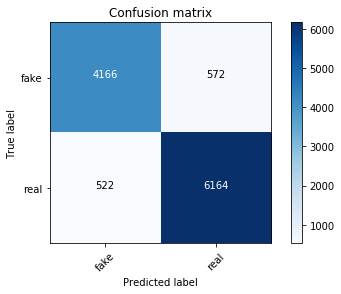

In [17]:
print_baseline_results(tf_baseline_results, parameters_logreg)

### TF-IDF BaseLine

In [12]:
%%time
tf_idf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_idf_vect_baseline, parameters_logreg, LogisticRegression())

random state:  10
train time: 15.067s
random state:  20
train time: 19.362s
random state:  30
train time: 18.651s
random state:  40
train time: 14.631s
random state:  50
train time: 17.508s
random state:  60
train time: 17.406s
random state:  70
train time: 14.217s
random state:  80
train time: 18.110s
random state:  90
train time: 16.399s
random state:  100
train time: 16.559s
CPU times: user 1min 5s, sys: 34.8 s, total: 1min 40s
Wall time: 3min 27s


Numero de caracteristicas:  (26653, 48349)

Best score selected:  0.9072149476606761
Best Accuracy:  0.9055497198879552
Best Best F1-score:  0.9027361302438166
Best random state:  40
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9072149476606761
C: 10


Exactitud: 0.9055497198879552
F1_score: 0.9027361302438166
Precision: 0.902674572250307
Recall: 0.9027980633284622

             precision    recall  f1-score   support

   negative     0.8857    0.8867    0.8862      4738
   positive     0.9196    0.9189    0.9193      6686

avg / total     0.9056    0.9055    0.9056     11424

[[4201  537]
 [ 542 6144]]

Confusion matrix, without normalization
[[4201  537]
 [ 542 6144]]


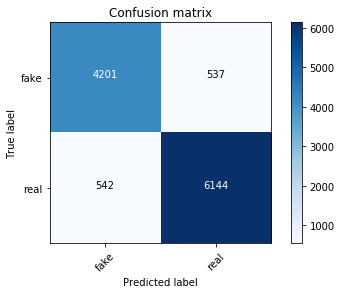

In [14]:
print_baseline_results(tf_idf_baseline_results, parameters_logreg)

### Binary BaseLine

In [15]:
%%time
binary_baseline_results = run_tests_splits(total_data_content, total_data_target, binary_vect_baseline, parameters_logreg, LogisticRegression())

random state:  10
train time: 33.101s
random state:  20
train time: 27.531s
random state:  30
train time: 28.394s
random state:  40
train time: 27.870s
random state:  50
train time: 30.521s
random state:  60
train time: 27.076s
random state:  70
train time: 23.100s
random state:  80
train time: 20.209s
random state:  90
train time: 21.146s
random state:  100
train time: 18.490s
CPU times: user 1min 24s, sys: 38.1 s, total: 2min 2s
Wall time: 4min 45s


Numero de caracteristicas:  (26653, 48349)

Best score selected:  0.905676659287885
Best Accuracy:  0.9022233893557423
Best Best F1-score:  0.8991413887128009
Best random state:  40
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.905676659287885
C: 1


Exactitud: 0.9022233893557423
F1_score: 0.8991413887128009
Precision: 0.8997768553706467
Recall: 0.8985419594278323

             precision    recall  f1-score   support

   negative     0.8861    0.8770    0.8815      4738
   positive     0.9134    0.9201    0.9168      6686

avg / total     0.9021    0.9022    0.9021     11424

[[4155  583]
 [ 534 6152]]

Confusion matrix, without normalization
[[4155  583]
 [ 534 6152]]


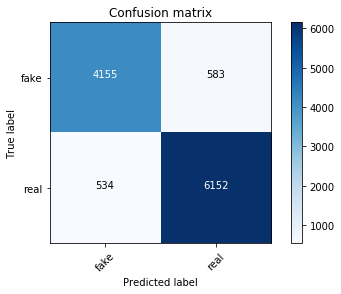

In [16]:
print_baseline_results(binary_baseline_results, parameters_logreg)

In [115]:
all_experiments_results = []

## Prueba de la linea base con los parametros optimos
Esta prueba se hace para validar los resultados obtenidos anteriormente. Si esta bien debe dar lo mismo o un resultado muy similar dependiendo del clasificador.

### TF BaseLine

Numero de caracteristicas:  (26653, 48349)

train time: 5.506s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9066896784602109
C: 1

Exactitud: 0.9042366946778712
F1_score: 0.9012150358612995
Precision: 0.9018675062625149
Recall: 0.9006001843282594

             precision    recall  f1-score   support

   negative     0.8887    0.8793    0.8839      4738
   positive     0.9151    0.9219    0.9185      6686

avg / total     0.9041    0.9042    0.9042     11424

[[4166  572]
 [ 522 6164]]

Confusion matrix, without normalization
[[4166  572]
 [ 522 6164]]
CPU times: user 2.96 s, sys: 1.94 s, total: 4.9 s
Wall time: 7.16 s


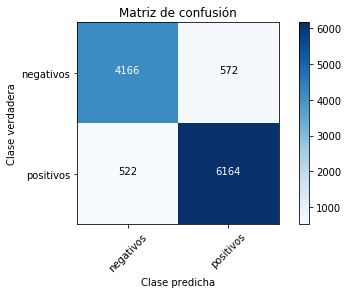

In [116]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_vect_baseline, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_vect_baseline)

### TF-IDF BaseLine

Numero de caracteristicas:  (26653, 48349)

train time: 3.667s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9072149476606761
C: 10

Exactitud: 0.9055497198879552
F1_score: 0.9027361302438166
Precision: 0.902674572250307
Recall: 0.9027980633284622

             precision    recall  f1-score   support

   negative     0.8857    0.8867    0.8862      4738
   positive     0.9196    0.9189    0.9193      6686

avg / total     0.9056    0.9055    0.9056     11424

[[4201  537]
 [ 542 6144]]

Confusion matrix, without normalization
[[4201  537]
 [ 542 6144]]
CPU times: user 2.44 s, sys: 1.96 s, total: 4.39 s
Wall time: 5.13 s


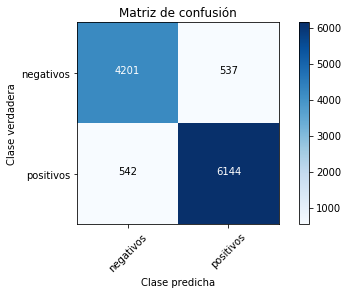

In [117]:
%%time
optimal_parameters = {'C': [10]}
clf_tf_idf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_baseline, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_idf_vect_baseline)

### Binary BaseLine

Numero de caracteristicas:  (26653, 48349)

train time: 4.796s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.905676659287885
C: 1

Exactitud: 0.9022233893557423
F1_score: 0.8991413887128009
Precision: 0.8997768553706467
Recall: 0.8985419594278323

             precision    recall  f1-score   support

   negative     0.8861    0.8770    0.8815      4738
   positive     0.9134    0.9201    0.9168      6686

avg / total     0.9021    0.9022    0.9021     11424

[[4155  583]
 [ 534 6152]]

Confusion matrix, without normalization
[[4155  583]
 [ 534 6152]]
CPU times: user 2.53 s, sys: 1.85 s, total: 4.38 s
Wall time: 6.09 s


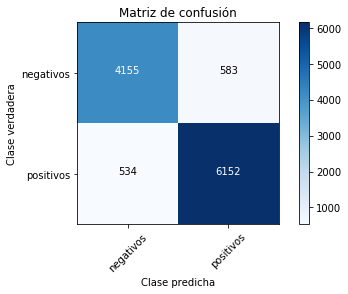

In [118]:
%%time
optimal_parameters = {'C': [1]}
clf_binary_vect_baseline = run_one_experiment(total_data_content, total_data_target, binary_vect_baseline, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_binary_vect_baseline)

## Experimento 1: Remocion de stop words

In [119]:
spanish_stopwords = stopwords.words('spanish')

In [120]:
tf_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                    analyzer = 'word',
                                    tokenizer = default_tokenize,
                                    lowercase = True)
tf_idf_vect_stopwords = TfidfVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True)
binary_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True,
                                        binary=True)

### TF stop words

Numero de caracteristicas:  (26653, 48099)

train time: 3.667s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8935204292199752
C: 1

Exactitud: 0.8957457983193278
F1_score: 0.8923083870027642
Precision: 0.8935520812310417
Recall: 0.8911939566898038

             precision    recall  f1-score   support

   negative     0.8818    0.8645    0.8731      4738
   positive     0.9053    0.9179    0.9115      6686

avg / total     0.8956    0.8957    0.8956     11424

[[4096  642]
 [ 549 6137]]

Confusion matrix, without normalization
[[4096  642]
 [ 549 6137]]
CPU times: user 2.23 s, sys: 1.72 s, total: 3.95 s
Wall time: 4.94 s


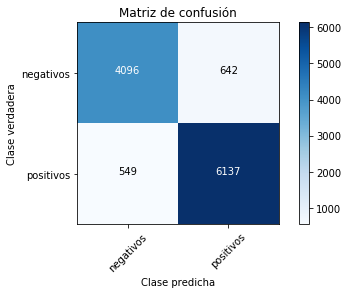

In [121]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_vect_stopwords, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_vect_stopwords)

### TF-IDF stop words

Numero de caracteristicas:  (26653, 48099)

train time: 3.592s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8953963906502083
C: 10

Exactitud: 0.897671568627451
F1_score: 0.8943384982475207
Precision: 0.8954133092745463
Recall: 0.893361878244101

             precision    recall  f1-score   support

   negative     0.8832    0.8681    0.8756      4738
   positive     0.9076    0.9186    0.9131      6686

avg / total     0.8975    0.8977    0.8975     11424

[[4113  625]
 [ 544 6142]]

Confusion matrix, without normalization
[[4113  625]
 [ 544 6142]]
CPU times: user 2.26 s, sys: 2.01 s, total: 4.27 s
Wall time: 4.98 s


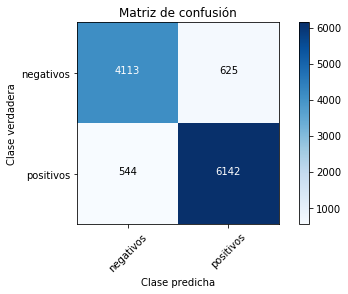

In [122]:
%%time
optimal_parameters = {'C': [10]}
clf_tf_idf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stopwords, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_idf_vect_stopwords)

### Binary stop words

Numero de caracteristicas:  (26653, 48099)

train time: 4.049s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8940456984204405
C: 1

Exactitud: 0.8975840336134454
F1_score: 0.894155747072552
Precision: 0.8956297991303469
Recall: 0.8928566422886504

             precision    recall  f1-score   support

   negative     0.8853    0.8651    0.8751      4738
   positive     0.9059    0.9206    0.9132      6686

avg / total     0.8974    0.8976    0.8974     11424

[[4099  639]
 [ 531 6155]]

Confusion matrix, without normalization
[[4099  639]
 [ 531 6155]]
CPU times: user 2.67 s, sys: 2.15 s, total: 4.82 s
Wall time: 5.6 s


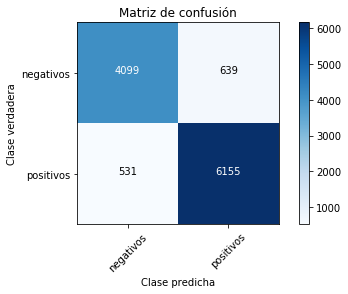

In [123]:
%%time
optimal_parameters = {'C': [1]}
clf_binary_vect_stopwords = run_one_experiment(total_data_content, total_data_target, binary_vect_stopwords, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_binary_vect_stopwords)

## Experimento 2: Stemming

In [124]:
#Prueba de tokenize_stems
print(tokenize_stems(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaa', 'com', 'estas', 'estaa', 'cre', 'en', 'mi', 'si', 'llov', 'mañan', 'tu', 'cre', 'en', 'mi', 'cart', 'aeiou']


In [125]:
tf_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

tf_idf_vect_stemming = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

binary_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True,
                binary=True)

### TF stemming

Numero de caracteristicas:  (26653, 32900)

train time: 5.525s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9090909090909091
C: 1

Exactitud: 0.9076505602240896
F1_score: 0.9046547611851484
Precision: 0.9056981107019868
Recall: 0.903701206139174

             precision    recall  f1-score   support

   negative     0.8951    0.8805    0.8878      4738
   positive     0.9163    0.9269    0.9216      6686

avg / total     0.9075    0.9077    0.9075     11424

[[4172  566]
 [ 489 6197]]

Confusion matrix, without normalization
[[4172  566]
 [ 489 6197]]
CPU times: user 19.6 s, sys: 2.02 s, total: 21.7 s
Wall time: 23.8 s


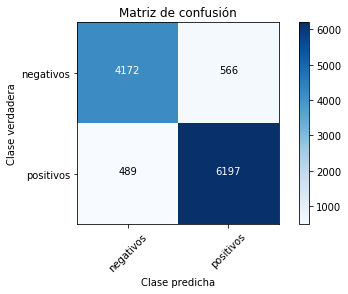

In [126]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_vect_stemming, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_vect_stemming)

### TF-IDF stemming

Numero de caracteristicas:  (26653, 32900)

train time: 3.728s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9087532360334671
C: 10

Exactitud: 0.9060749299719888
F1_score: 0.9032173274475952
Precision: 0.9034065026683615
Recall: 0.9030315356887567

             precision    recall  f1-score   support

   negative     0.8880    0.8852    0.8866      4738
   positive     0.9188    0.9209    0.9198      6686

avg / total     0.9060    0.9061    0.9061     11424

[[4194  544]
 [ 529 6157]]

Confusion matrix, without normalization
[[4194  544]
 [ 529 6157]]
CPU times: user 19.1 s, sys: 2.06 s, total: 21.2 s
Wall time: 21.8 s


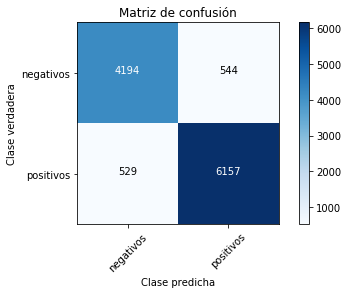

In [127]:
%%time
optimal_parameters = {'C': [10]}
clf_tf_idf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stemming, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_idf_vect_stemming)

### Binary stemming

Numero de caracteristicas:  (26653, 32900)

train time: 5.025s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9066521592316062
C: 1

Exactitud: 0.9082633053221288
F1_score: 0.9053507358898318
Precision: 0.9060937759574814
Recall: 0.9046551408681813

             precision    recall  f1-score   support

   negative     0.8941    0.8835    0.8887      4738
   positive     0.9181    0.9258    0.9220      6686

avg / total     0.9081    0.9083    0.9082     11424

[[4186  552]
 [ 496 6190]]

Confusion matrix, without normalization
[[4186  552]
 [ 496 6190]]
CPU times: user 19.2 s, sys: 2 s, total: 21.2 s
Wall time: 22.9 s


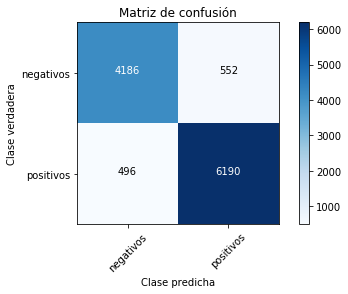

In [128]:
%%time
optimal_parameters = {'C': [1]}
clf_binary_vect_stemming = run_one_experiment(total_data_content, total_data_target, binary_vect_stemming, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_binary_vect_stemming)

## Experimento 3: Lematizacion

In [129]:
# Prueba del tokenizer
print(tokenize_lemmas(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaaa', 'comer', 'este', 'estaaaas', 'creer', 'en', 'mi', 'si', 'llover', 'mañana', 'tu', 'creer', 'en', 'mi', 'carta', 'aeiou']


In [130]:
tf_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

tf_idf_vect_lemmatize = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

binary_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True,
                binary=True)

### TF lemmatize

Numero de caracteristicas:  (26653, 36795)

train time: 5.308s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9106667166923048
C: 1

Exactitud: 0.90843837535014
F1_score: 0.905404156341834
Precision: 0.9067643949251789
Recall: 0.9041897745167129

             precision    recall  f1-score   support

   negative     0.8978    0.8793    0.8885      4738
   positive     0.9157    0.9291    0.9223      6686

avg / total     0.9083    0.9084    0.9083     11424

[[4166  572]
 [ 474 6212]]

Confusion matrix, without normalization
[[4166  572]
 [ 474 6212]]
CPU times: user 2.91 s, sys: 1.88 s, total: 4.79 s
Wall time: 7 s


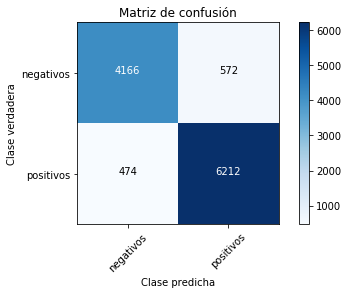

In [131]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_vect_lemmatize, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_vect_lemmatize)

### TF-IDF lemmatize

Numero de caracteristicas:  (26653, 36795)

train time: 3.669s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9112295051213747
C: 10

Exactitud: 0.9094887955182073
F1_score: 0.906615134456189
Precision: 0.9073604535303822
Recall: 0.9059173310864091

             precision    recall  f1-score   support

   negative     0.8956    0.8850    0.8902      4738
   positive     0.9192    0.9269    0.9230      6686

avg / total     0.9094    0.9095    0.9094     11424

[[4193  545]
 [ 489 6197]]

Confusion matrix, without normalization
[[4193  545]
 [ 489 6197]]
CPU times: user 2.6 s, sys: 2.01 s, total: 4.61 s
Wall time: 5.34 s


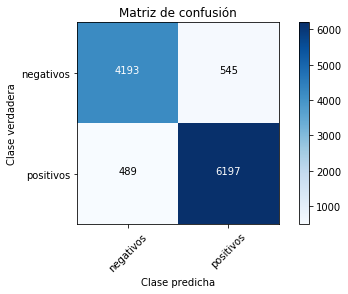

In [132]:
%%time
optimal_parameters = {'C': [10]}
clf_tf_idf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_lemmatize, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_idf_vect_lemmatize)

### Binary lemmatize

Numero de caracteristicas:  (26653, 36795)

train time: 4.831s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9087157168048625
C: 1

Exactitud: 0.9090511204481793
F1_score: 0.9060584721415877
Precision: 0.907314243015981
Recall: 0.904928482832458

             precision    recall  f1-score   support

   negative     0.8980    0.8808    0.8893      4738
   positive     0.9166    0.9291    0.9228      6686

avg / total     0.9089    0.9091    0.9089     11424

[[4173  565]
 [ 474 6212]]

Confusion matrix, without normalization
[[4173  565]
 [ 474 6212]]
CPU times: user 2.93 s, sys: 1.93 s, total: 4.86 s
Wall time: 6.42 s


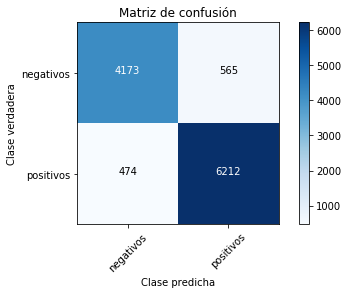

In [133]:
%%time
optimal_parameters = {'C': [1]}
clf_binary_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, binary_vect_lemmatize, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_binary_vect_lemmatize)

## Experimento 4: Remocion de URLs

In [134]:
# Prueba de la tokenizacion sin urls
print(tokenize_no_urls(
    "holaaaa cómo http://estas creerías https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python mi si lloviera \t  mañana, tu crees en mi cartas ¡¡ ¿¿. aeiou"))

['holaaaa', 'cómo', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [135]:
tf_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

tf_idf_vect_no_urls = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

binary_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True,
                binary=True)

### TF sin URLs

Numero de caracteristicas:  (26653, 40405)

train time: 5.106s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9054890631448618
C: 1

Exactitud: 0.9052871148459384
F1_score: 0.9022800536572501
Precision: 0.9030175589947222
Recall: 0.9015898217667708

             precision    recall  f1-score   support

   negative     0.8904    0.8799    0.8851      4738
   positive     0.9156    0.9233    0.9194      6686

avg / total     0.9052    0.9053    0.9052     11424

[[4169  569]
 [ 513 6173]]

Confusion matrix, without normalization
[[4169  569]
 [ 513 6173]]
CPU times: user 2.63 s, sys: 1.99 s, total: 4.62 s
Wall time: 6.46 s


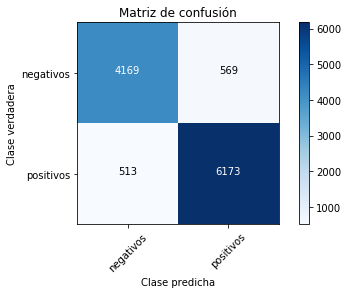

In [136]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_vect_no_urls, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_vect_no_urls)

### TF-IDF sin URLs

Numero de caracteristicas:  (26653, 40405)

train time: 3.508s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.906126890031141
C: 10

Exactitud: 0.9057247899159664
F1_score: 0.9029460985120392
Precision: 0.9027634614819955
Recall: 0.9031321093691107

             precision    recall  f1-score   support

   negative     0.8851    0.8879    0.8865      4738
   positive     0.9204    0.9183    0.9194      6686

avg / total     0.9058    0.9057    0.9057     11424

[[4207  531]
 [ 546 6140]]

Confusion matrix, without normalization
[[4207  531]
 [ 546 6140]]
CPU times: user 2.28 s, sys: 1.96 s, total: 4.24 s
Wall time: 4.87 s


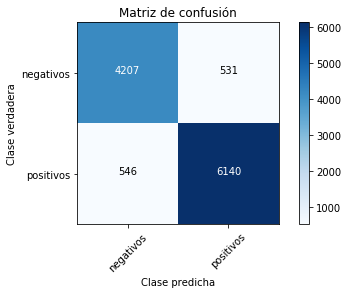

In [137]:
%%time
optimal_parameters = {'C': [10]}
clf_tf_idf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_no_urls, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_idf_vect_no_urls)

### Binary sin URLs

Numero de caracteristicas:  (26653, 40405)

train time: 4.953s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9048887554871872
C: 1

Exactitud: 0.9032738095238095
F1_score: 0.9002625878413338
Precision: 0.9007374127676653
Recall: 0.8998083165405382

             precision    recall  f1-score   support

   negative     0.8864    0.8795    0.8829      4738
   positive     0.9151    0.9201    0.9176      6686

avg / total     0.9032    0.9033    0.9032     11424

[[4167  571]
 [ 534 6152]]

Confusion matrix, without normalization
[[4167  571]
 [ 534 6152]]
CPU times: user 2.64 s, sys: 2.1 s, total: 4.74 s
Wall time: 6.25 s


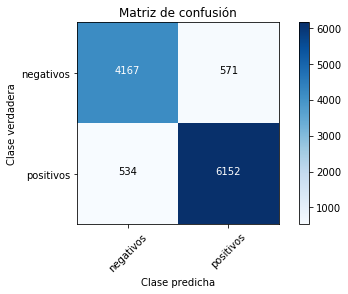

In [138]:
%%time
optimal_parameters = {'C': [1]}
clf_binary_vect_no_urls = run_one_experiment(total_data_content, total_data_target, binary_vect_no_urls, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_binary_vect_no_urls)

## Experimento 5: Remocion de letras repetidas

In [139]:
print(tokenize_norm_letters(
    "holaaaa cómo http://estas estaaaas creerías mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['hola', 'cómo', 'htp', 'estas', 'estas', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [140]:
tf_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

tf_idf_vect_norm_letters = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

binary_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True,
                binary=True)

### TF sin letras repetidas

Numero de caracteristicas:  (26653, 47550)

train time: 5.337s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9064645630885829
C: 1

Exactitud: 0.9046743697478992
F1_score: 0.9016758307827664
Precision: 0.9022878245068475
Recall: 0.9010970864947541

             precision    recall  f1-score   support

   negative     0.8889    0.8801    0.8845      4738
   positive     0.9156    0.9221    0.9188      6686

avg / total     0.9046    0.9047    0.9046     11424

[[4170  568]
 [ 521 6165]]

Confusion matrix, without normalization
[[4170  568]
 [ 521 6165]]
CPU times: user 7.24 s, sys: 1.96 s, total: 9.2 s
Wall time: 11.4 s


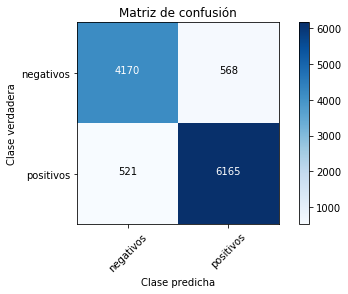

In [141]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_vect_norm_letters, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_vect_norm_letters)

### TF-IDF sin letras repetidas

Numero de caracteristicas:  (26653, 47550)

train time: 3.451s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9070648707462574
C: 10

Exactitud: 0.90625
F1_score: 0.9034394786328614
Precision: 0.9034518972990517
Recall: 0.9034270749903373

             precision    recall  f1-score   support

   negative     0.8871    0.8869    0.8870      4738
   positive     0.9198    0.9200    0.9199      6686

avg / total     0.9062    0.9062    0.9062     11424

[[4202  536]
 [ 535 6151]]

Confusion matrix, without normalization
[[4202  536]
 [ 535 6151]]
CPU times: user 6.66 s, sys: 1.76 s, total: 8.42 s
Wall time: 9.19 s


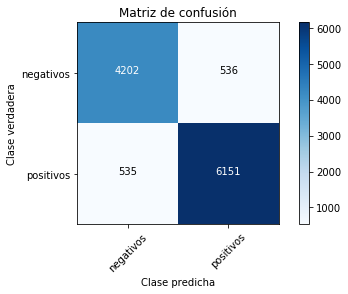

In [142]:
%%time
optimal_parameters = {'C': [10]}
clf_tf_idf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_norm_letters, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_idf_vect_norm_letters)

### Binary sin letras repetidas

Numero de caracteristicas:  (26653, 47550)

train time: 4.450s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.906014332345327
C: 1

Exactitud: 0.9023984593837535
F1_score: 0.8993156170641032
Precision: 0.8999787625657063
Recall: 0.8986915256856846

             precision    recall  f1-score   support

   negative     0.8865    0.8770    0.8817      4738
   positive     0.9135    0.9204    0.9169      6686

avg / total     0.9023    0.9024    0.9023     11424

[[4155  583]
 [ 532 6154]]

Confusion matrix, without normalization
[[4155  583]
 [ 532 6154]]
CPU times: user 6.95 s, sys: 1.8 s, total: 8.76 s
Wall time: 10.2 s


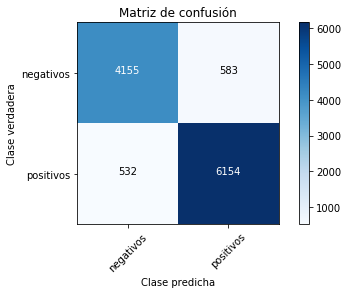

In [143]:
%%time
optimal_parameters = {'C': [1]}
clf_binary_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, binary_vect_norm_letters, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_binary_vect_norm_letters)

## Experimento 6: Remocion de terminos poco comunes (pruning < 10)

In [144]:
tf_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

tf_idf_vect_pruning10 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

binary_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=10)

### TF pruning < 10

Numero de caracteristicas:  (26653, 4348)

train time: 4.199s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8999362173113721
C: 1

Exactitud: 0.897671568627451
F1_score: 0.8944527513177721
Precision: 0.8950538971596292
Recall: 0.8938845709620236

             precision    recall  f1-score   support

   negative     0.8804    0.8717    0.8760      4738
   positive     0.9097    0.9161    0.9129      6686

avg / total     0.8976    0.8977    0.8976     11424

[[4130  608]
 [ 561 6125]]

Confusion matrix, without normalization
[[4130  608]
 [ 561 6125]]
CPU times: user 2.56 s, sys: 2.03 s, total: 4.59 s
Wall time: 5.69 s


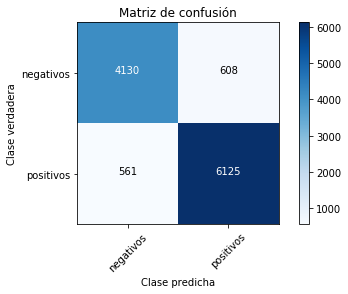

In [145]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning10, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_vect_pruning10)

### TF-IDF pruning < 10

Numero de caracteristicas:  (26653, 4348)

train time: 3.433s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8989607173676509
C: 10

Exactitud: 0.8988970588235294
F1_score: 0.8958725077439709
Precision: 0.8958603500639122
Recall: 0.8958846803114362

             precision    recall  f1-score   support

   negative     0.8780    0.8782    0.8781      4738
   positive     0.9137    0.9136    0.9136      6686

avg / total     0.8989    0.8989    0.8989     11424

[[4161  577]
 [ 578 6108]]

Confusion matrix, without normalization
[[4161  577]
 [ 578 6108]]
CPU times: user 2.35 s, sys: 2.03 s, total: 4.38 s
Wall time: 4.95 s


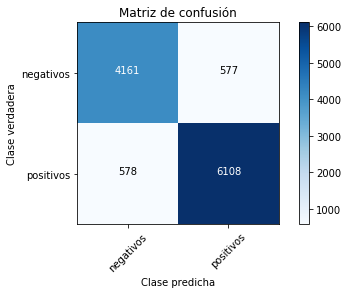

In [146]:
%%time
optimal_parameters = {'C': [10]}
clf_tf_idf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning10, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_idf_vect_pruning10)

### Binary pruning < 10

Numero de caracteristicas:  (26653, 4348)

train time: 3.702s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8996735827111395
C: 1

Exactitud: 0.8962710084033614
F1_score: 0.8929675109118476
Precision: 0.8937293438135251
Recall: 0.8922575880726813

             precision    recall  f1-score   support

   negative     0.8797    0.8687    0.8742      4738
   positive     0.9078    0.9158    0.9118      6686

avg / total     0.8961    0.8963    0.8962     11424

[[4116  622]
 [ 563 6123]]

Confusion matrix, without normalization
[[4116  622]
 [ 563 6123]]
CPU times: user 2.36 s, sys: 1.91 s, total: 4.27 s
Wall time: 5.06 s


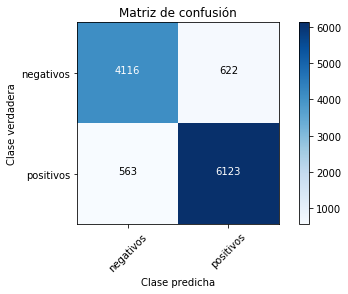

In [147]:
%%time
optimal_parameters = {'C': [1]}
clf_binary_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning10, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_binary_vect_pruning10)

## Experimento 7: Remocion de terminos poco comunes (pruning < 5)

In [148]:
tf_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

tf_idf_vect_pruning5 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

binary_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=5)

### TF pruning < 5

Numero de caracteristicas:  (26653, 7822)

train time: 4.518s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.905676659287885
C: 1

Exactitud: 0.9043242296918768
F1_score: 0.9013518944627881
Precision: 0.9018012606147838
Recall: 0.9009209405009138

             precision    recall  f1-score   support

   negative     0.8875    0.8810    0.8842      4738
   positive     0.9161    0.9209    0.9185      6686

avg / total     0.9042    0.9043    0.9043     11424

[[4174  564]
 [ 529 6157]]

Confusion matrix, without normalization
[[4174  564]
 [ 529 6157]]
CPU times: user 2.47 s, sys: 1.84 s, total: 4.31 s
Wall time: 5.86 s


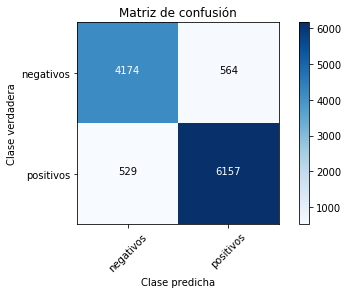

In [149]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning5, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_vect_pruning5)

### TF-IDF pruning < 5

Numero de caracteristicas:  (26653, 7822)

train time: 3.174s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9057516977450943
C: 10

Exactitud: 0.9024859943977591
F1_score: 0.8995780590717299
Precision: 0.8995291428617596
Recall: 0.8996272144676597

             precision    recall  f1-score   support

   negative     0.8821    0.8829    0.8825      4738
   positive     0.9169    0.9164    0.9167      6686

avg / total     0.9025    0.9025    0.9025     11424

[[4183  555]
 [ 559 6127]]

Confusion matrix, without normalization
[[4183  555]
 [ 559 6127]]
CPU times: user 2.25 s, sys: 1.86 s, total: 4.11 s
Wall time: 4.53 s


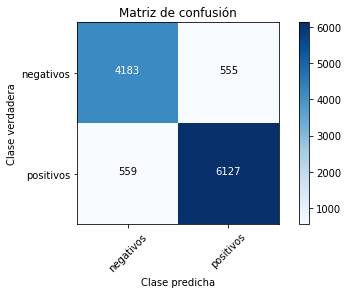

In [150]:
%%time
optimal_parameters = {'C': [10]}
clf_tf_idf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning5, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_tf_idf_vect_pruning5)

### Binary pruning < 5

Numero de caracteristicas:  (26653, 7822)

train time: 3.983s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9042134093723033
C: 1

Exactitud: 0.9020483193277311
F1_score: 0.8989926067011254
Precision: 0.899492639025467
Recall: 0.8985153796918443

             precision    recall  f1-score   support

   negative     0.8851    0.8778    0.8814      4738
   positive     0.9139    0.9192    0.9166      6686

avg / total     0.9019    0.9020    0.9020     11424

[[4159  579]
 [ 540 6146]]

Confusion matrix, without normalization
[[4159  579]
 [ 540 6146]]
CPU times: user 2.42 s, sys: 1.94 s, total: 4.35 s
Wall time: 5.34 s


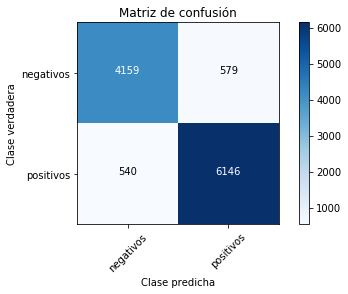

In [151]:
%%time
optimal_parameters = {'C': [1]}
clf_binary_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning5, optimal_parameters, LogisticRegression(), 40)
all_experiments_results.append(clf_binary_vect_pruning5)

In [152]:
len(all_experiments_results)

24

In [153]:
#save_excel_results('result_es_twitter_sa_logreg.xlsx', all_experiments_results)